# Taskcluster Client Dependencies
This notebook give an overview of the various repositories using `environment variables` and `configuration files`.

We shall be having a look at the following repositories and understanding how do they get the credentials.
- [taskcluster-cli](https://github.com/taskcluster/taskcluster-cli)
- [taskcluster-client.py](https://github.com/taskcluster/taskcluster-client.py)
- [taskcluster-client](https://github.com/taskcluster/taskcluster-client)
- [taskcluster-client-go](https://github.com/taskcluster/taskcluster-client-go)
- [taskcluster-client-java](https://github.com/taskcluster/taskcluster-client-java)

|                       | client-java | cli | client-go | client.py | client |
|:---------------------:|:-----------:|:---:|:---------:|:---------:|:------:|
|     Configuration Files     |             |  ✔️  |           |          |        |
| Environment Variables |      ✔️      |  ✔️   |     ✔️     |      ✔️     |    ✔️   |

## Making infographics
We shall now be looking at various insights which can be generated from these *repositories*.

### Making imports
The imports for `matplotlib` and `pandas` are done in order to visualise the data.

In [6]:
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (14, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

### Making Function for Plotting
The following steps are followed in order to make a histogram.
- We make a subplot.
- Set *x* and *y* labels.
- Give a suitable title.
- As the names of certain cities is long, we want them to be displayed in our plot, hence give a tight layout.
- We make a provision for trimming i.e. to display only top *n* values.

In [10]:
def myhis(position,files,labels,colors,title,save=False):
    plt.bar(position,files,color=colors)
    #plt.xticks(labels)
    plt.xticks( position,labels)
    plt.title(title)
    #fig=ax.get_figure()
    plt.tight_layout()
    red_patch = mpatches.Patch(color='red', label='Configuration Files')
    grey_patch = mpatches.Patch(color='lightgrey', label='Environment Variables')
    pink_patch = mpatches.Patch(color='pink', label='Both')
    plt.legend(handles=[red_patch,grey_patch,pink_patch])
    if save:
        fig.savefig(title+'.png')
    else:
        plt.show()

We now check the number of files in which the word `credentials` occurs.

In [11]:
credentials=[['taskcluster-cli',2,18],\
['taskcluster-client.py',1, 43],\
['taskcluster-client', 1,9],\
['taskcluster-client-go',1,26],\
['taskcluster-client-java',1,40]]
labels=[i[0] for i in credentials]
colors=['red' if i[1] == 0 else 'lightgrey' if i[1]==1 else 'pink' for i in credentials]
files =[i[2] for i in credentials]
position=[i for i in range(1,6)]

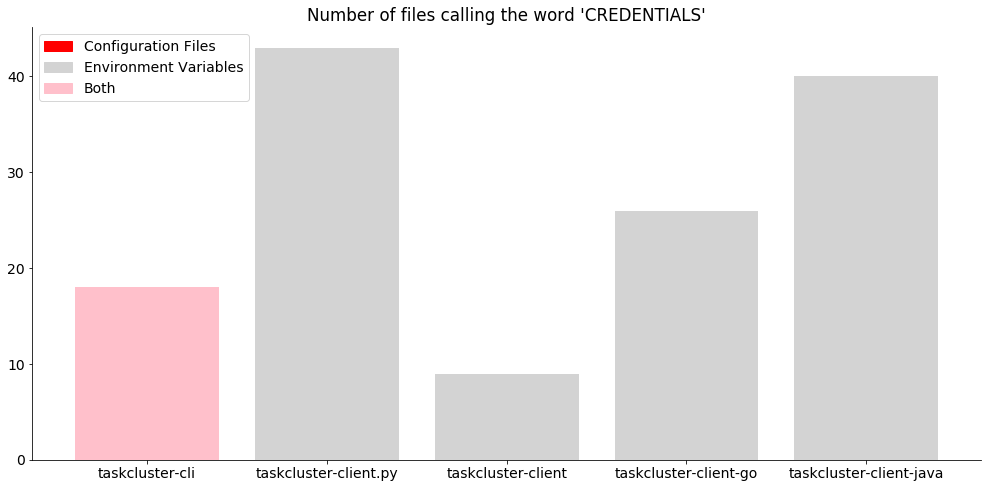

In [12]:
myhis( position,files,labels,colors
           , title = 'Number of files calling the word \'CREDENTIALS\'')

In [13]:
client=[['taskcluster-cli',2,2],\
['taskcluster-client.py',1, 2],\
['taskcluster-client', 1,3],\
['taskcluster-client-go',1,4],\
['taskcluster-client-java',1,2]]
labels=[i[0] for i in client]
colors=['red' if i[1] == 0 else 'lightgrey' if i[1]==1 else 'pink' for i in client]
files =[i[2] for i in client]
position=[i for i in range(1,6)]

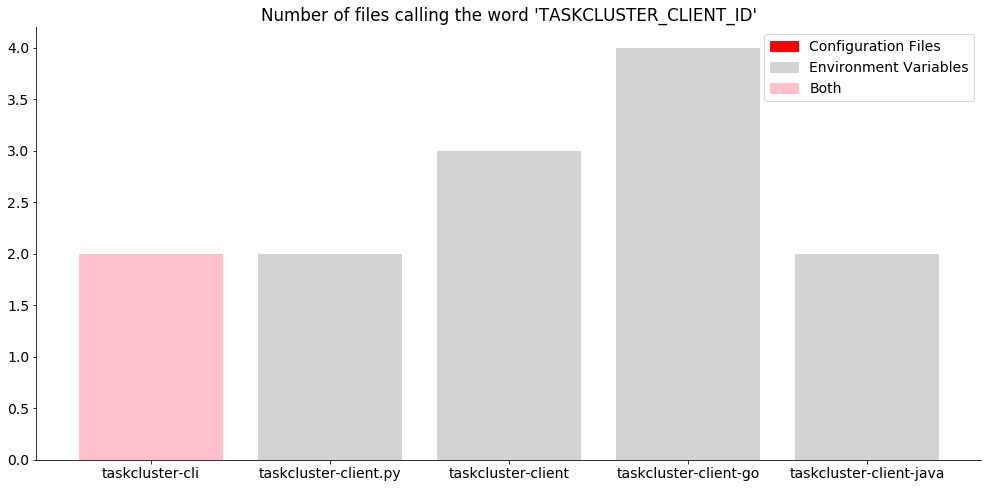

In [14]:
myhis( position,files,labels,colors
           , title = 'Number of files calling the word \'TASKCLUSTER_CLIENT_ID\'')

It seems that `taskcluster-cli` needs to be updated as it uses both `Environment Variables` and `Configuration Files`. It would be easier to do as through the histogram, it is clear that fewer files need to be updated in taskcluster-cli.